# Вычислительная математика
## 4.2 Преобразование Фурье

Ярослав Холодов, Лукьянчук Вячеслав

Содержание семинара:

- Напоминание про ряд Фурье (непрерывный случай)
- Дискретный Фурье (DFT)
- Дискретный Фурье как оператор
- Сравнение DFT и FFT на практике
- Простой пример FFT в python
    - Отличие FFT и RFFT
- Анализ сезонности во временных рядах (реальный пример)
- Задание

![original image](https://cdn.mathpix.com/snip/images/9celAxuw--BcWI_64zYjwdUqWnzPNBCoOdQhK8XFD_0.original.fullsize.png)

## Напоминание про ряд Фурье (непрерывный случай)

Рассмотрим разложение произвольной действительной функции в следующем виде

$$
x(t)=\sum_{i=1}^n A_i \cos \left(2 \pi \nu_i t+\phi_i\right)
$$

Здесь мы определяем набор частот $\left\{\nu_i\right\}$ некоторым способом, который мы обсудим позже. Значения амплитуд и сдвиг фаз оцениваются для каждого данного $\nu_i$. Ряд Фурье описывает сигнал $x(t)$ набором пар $\left\{A_i^2, \nu_i\right\}_{i=1}^n$, где $A_i^2$ представляет собой интенсивность $i$-й косинусоиды. Этот набор пар называется спектром.

![original image](https://cdn.mathpix.com/snip/images/9celAxuw--BcWI_64zYjwdUqWnzPNBCoOdQhK8XFD_0.original.fullsize.png)

Как вычислить $A_i$? Раскроем к общепринятому виду.

$$
\begin{aligned}
A_i \cos \left(2 \pi \nu_i t+\phi_i\right) & =A_i \cos \left(\phi_i\right) \cos \left(2 \pi \nu_i t\right)-A_i \sin \left(\phi_i\right) \sin \left(2 \pi \nu_i t\right)= \\
& =a_i \cos \left(2 \pi \nu_i t\right)+b_i \sin \left(2 \pi \nu_i t\right)
\end{aligned}
$$

А тогда разложение,

$$
x(t)=\sum_{i=1}^n\left(a_i \cos \left(2 \pi \nu_i t\right)+b_i \sin \left(2 \pi \nu_i t\right)\right) = \sum_{i=1}^n\left(a_i - i \cdot b_i \right) \cdot e^{2 \pi \nu_i t}
$$

где все коэффициенты считаются как

$$
\begin{aligned}
a_i & =\frac{2}{P} \int_P x(t) \cos \left(2 \pi \nu_i t\right) d t \\
b_i & =\frac{2}{P} \int_P x(t) \sin \left(2 \pi \nu_i t\right) d t
\end{aligned}
$$

и

$$
A_i^2=a_i^2+b_i^2=\left(a_i - i \cdot b_i \right)^2
$$

## Дискретный Фурье (DFT)

На компьютере нельзя задать континуальный набор точек - любой сигнал это дискретизованный конечный набор точек $\left\{x_n\right\}_{n=0}^{N-1}$. Его вывод возьмём с википедии

Рассмотрим некоторый периодический сигнал $x(t)$ с периодом, равным Т. Разложим его в ряд Фурье:

$$
x(t)=\sum_{k=-\infty}^{+\infty} c_k e^{i \omega_k t}, \quad \omega_k=\frac{2 \pi k}{T} .
$$

Проведем дискретизацию сигнала так, чтобы на периоде было $\mathrm{N}$ отсчетов. Дискретный сигнал представим в виде отсчетов: $x_n=x\left(t_n\right)$, где $t_n=\frac{n}{N} T$, тогда эти отсчеты через ряд Фурье запишутся следующим образом:

$$
x_n=\sum_{k=-\infty}^{+\infty} c_k e^{i \omega_k t_n}=\sum_{k=-\infty}^{+\infty} c_k e^{\frac{2 \pi i}{N} k n}
$$

Используя соотношение $e^{\frac{2 \pi i}{N}(k+m N) n}=e^{\frac{2 \pi i}{N} k n}$, получаем:

$$
x_n=\sum_{k=0}^{N-1} X_k e^{\frac{2 \pi i}{N} k n}, \quad \text { где } \quad X_k=\sum_{l=-\infty}^{+\infty} c_{k+l N} .
$$

Таким образом мы получили обратное дискретное преобразование Фурье.
Умножим теперь скалярно выражение для $x_n$ на $e^{-\frac{2 \pi i}{N} m n}$ и получим:

$$
\sum_{n=0}^{N-1} x_n e^{-\frac{2 \pi i}{N} m n}=\sum_{k=0}^{N-1} \sum_{n=0}^{N-1} X_k e^{\frac{2 \pi i}{N}(k-m) n}=\sum_{k=0}^{N-1} X_k \frac{1-e^{2 \pi i(k-m)}}{1-e^{\frac{2 \pi i(k-m)}{N}}}=\sum_{k=0}^{N-1} X_k N \delta_{k m} .
$$

Здесь использованы: а) выражение для суммы конечного числа членов (экспонент) геометрической прогрессии, и б) выражение символа Кронекера как предела отношения функций Эйлера для комплексных чисел. Отсюда следует, что:

$$
X_k=\frac{1}{N} \sum_{n=0}^{N-1} x_n e^{-\frac{2 \pi i}{N} k n} .
$$

Эта формула описывает прямое дискретное преобразование Фурье.
В литературе принято писать множитель $\frac{1}{N}$ в обратном преобразовании, и поэтому обычно пишут формулы преобразования в следующем виде:

$$
X_n=\sum_{m=0}^{N-1} x_m e^{-\frac{2 \pi i}{N} n \cdot m}, \quad x_m=\frac{1}{N} \sum_{n=0}^{N-1} X_n e^{\frac{2 \pi i}{N} n \cdot m}
$$

Дискретное преобразование Фурье является линейным преобразованием, которое переводит вектор временных отсчётов $\vec x$ в вектор спектральных отсчётов той же длины. Таким образом преобразование может быть реализовано как умножение симметричной квадратной матрицы на вектор:

$\vec X = \mathcal F \vec x,$

матрица <math> \mathcal F  </math> имеет вид:

$$
\mathcal F = \frac{1}{\sqrt n}\begin{pmatrix}
1 & 1 & 1 & 1 & \ldots & 1 \\
1 &\omega_n & \omega_n^2 & \omega_n^3 & \ldots & \omega_n^{n-1} \\
1 &\omega_n^2 & \omega_n^4 & \omega_n^6 & \ldots & \omega_n^{2(n-1)} \\
1 &\omega_n^3 & \omega_n^6 & \omega_n^9 & \ldots & \omega_n^{3(n-1)} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_n^{n-1} & \omega_n^{2(n-1)} & \omega_n^{3(n-1)} & \ldots &\omega_n^{(n-1)^2}
\end{pmatrix}.
$$

Элементы матрицы задаются следующей формулой:

$\mathcal F(j,k) = \omega_n^{(j-1)(k-1)}$,

где

$\omega_n = e^{-\frac{2\pi i}{n}}$.

Тут мы видим матрицу Вандермонда, которая получалась в задаче полиноминальной интерполяции.


Дискретное преобразование Фурье вектора $(a_0;a_1;\dots;a_{n-1})$ может быть интерпретировано как вычисление значений многочлена

 $p(x)=a_0+a_1 x + \dots + a_{n-1}x^{n-1}$

 в корнях из единицы
 $$
x_0=1, x_1=\omega_n, x_2 = \omega_n^2, …, x_{n-1}=\omega_n^{n-1}.
 $$

Значения многочлена $n$-й степени в $n+1$ точках однозначно определяют сам многочлен. В то же время, если $p(x)=a$ и $q(x)=b$, то $(p\cdot q)(x)=ab$, потому по значениям многочленов $p(x)$ и $q(x)$ можно также определить значения в тех же точках многочлена <math>p\cdot q</math> и восстановить его обратным дискретным преобразованием Фурье.

Так как любое число представимо в виде многочлена от основания системы счисления

$N=a_{n-1} \dots a_1 a_0 = a_0 + a_1 \cdot 10 + \dots + a_{n-1} \cdot 10^{n-1}$,

умножение двух чисел может быть в свою очередь сведено к умножению двух многочленов и нормализации результата.

## Дискретный Фурье как оператор

Заметим, что дискретный Фурье можно задать в операторной форме:

$$
\vec{X}=M \cdot \vec{x}
$$

с матрицей $M$ заданной

$$
M_{k n}=e^{-i 2 \pi \cdot k \cdot n / N}
$$

Итого,

$$
X_k = M_{kn} \cdot x_{n}
$$

Для обратного преобразования Фурье можно применять алгоритм прямого преобразования Фурье — нужно лишь использовать $\varepsilon^{-1}$ вместо $\varepsilon$ (или применить операцию комплексного сопряжения вначале к входным данным, а затем к результату, полученному после прямого преобразования Фурье), и окончательный результат поделить на $N$.


## Сравнение DFT и FFT на практике

При любом гуглинге встроенной в питоне реализации дискретного Фурье, узнаете о функции np.fft.fft. Вот только она работает не по тем формулам, которые мы описали выше. Это легко понять, сравнив время работы.

In [ ]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)

    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))

    M = np.exp(-2j * np.pi * k * n / N)

    return np.dot(M, x)

In [ ]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [ ]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

74.3 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.37 µs ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Отличие в скорости в 10000 раз... С чем это связано?

Оказывается, Fast Fourier Transform (FFT) использует определенные симметрии комплексных экспонент, засчёт чего не приходится делать так много вычислительных операций. Если бы FFT был открыт на пару лет раньше, "возможно" гонку вооружений США и СССР удалось бы остановить в зародыше (https://www.youtube.com/watch?v=eQlSvfUuQNs).

Для нас главное запомнить отличие в скорости:

- Обычный DFT работает за $\mathcal{O}\left[N^2\right]$

- FFT работает за $\mathcal{O}[N \log N]$

При больших $N$ разница колоссальная.

Fast Fourier Transform (FFT) часто также называют алгоритмом бабочки или алгоритмом Кули-Тюки. Он состоит из элементарных шагов - операций "бабочка".

У него две реализации - с прореживанием по времени и по частоте.

В случае прореживания по частоте шаг выглядит так


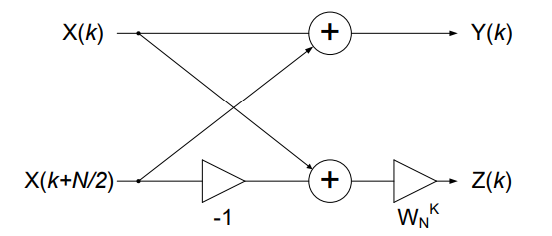

Формула для вычисления «Бабочки» с прореживанием по времени:
$$
Y_1 = X_1 + X_2  \\
Y_2 = (X_1 - X_2) \cdot {W^k_N}
$$

Обозначения:

$X_1$, $X_2$ – исходные точки;

$Y_1$, $Y_2$ – точки результата,

$W^k_N = exp(\frac{-j\cdot 2\cdot π \cdot k}{N} )$ – комплексный коэффициент.

А сама схема алгоритма так (светлый кружок означает операцию "бабочка")

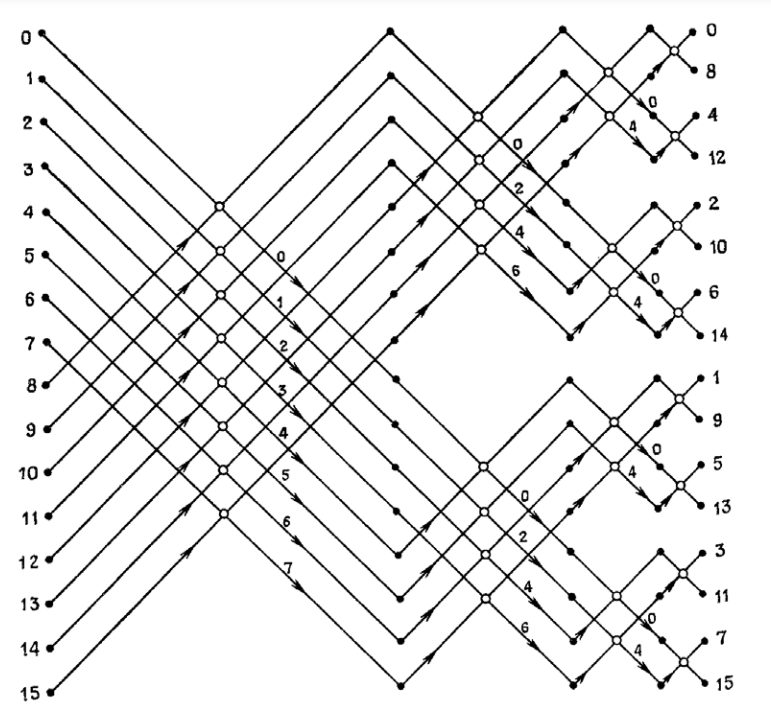

Алгоритм с прореживанием по времени устроен похожим образом

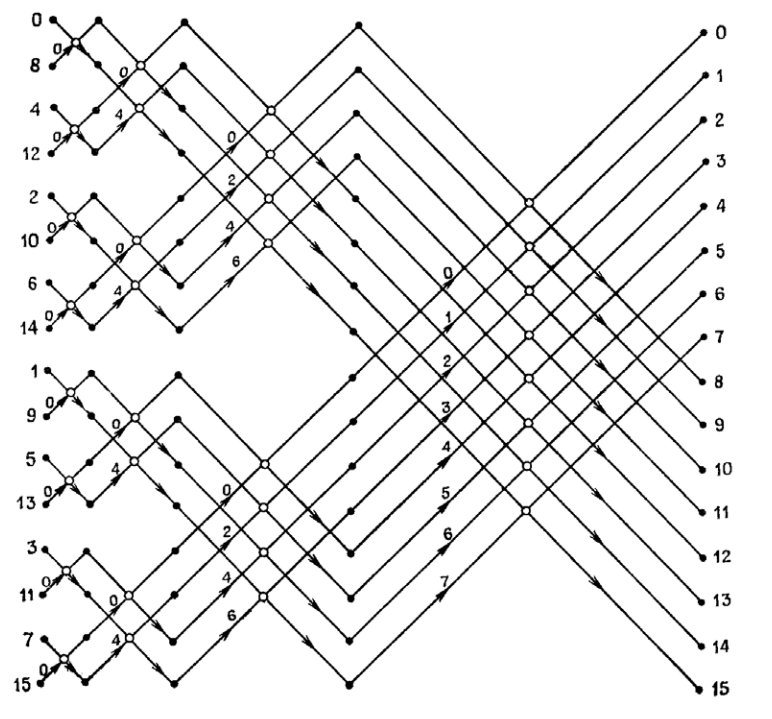

Формула для вычисления «Бабочки» с прореживанием по времени:
$$
Y_1 = X_1 + X_2 \cdot {W^k_N} \\
Y_2 = X_1 - X_2 \cdot {W^k_N}
$$

Обозначения:

$X_1$, $X_2$ – исходные точки;

$Y_1$, $Y_2$ – точки результата,

$W^k_N = exp(\frac{-j\cdot 2\cdot π \cdot k}{N} )$ – комплексный коэффициент.

## Простой пример FFT в python

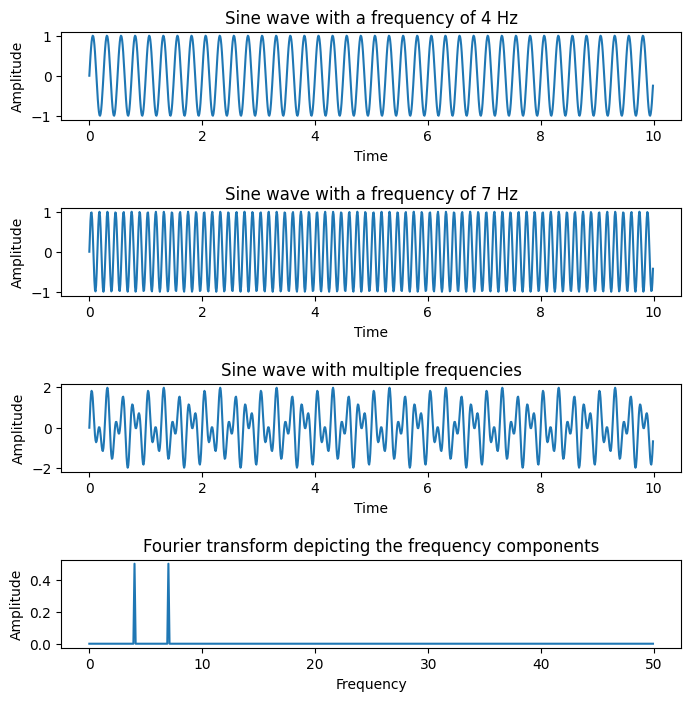

In [ ]:
# Python example - Fourier transform using numpy.fft method

import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10;

# Frequency of the signals
signal1Frequency     = 4;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(4, 1)
figure.set_size_inches(8, 8)
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))]

#fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))
#values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')

plt.show()

Видим, что спектр симметричен относительно своей середины. Это всегда верно для действительного сигнала. Чтобы не считать зря "ненужную" вторую половину спектра, лучше использовать numpy.fft.rfft: https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html

## Анализ сезонности во временных рядах (реальный пример)

Во временных рядах нередко присутствует периодическая (сезонная) составляющая.

Например, продажи в магазинах растут в субботу и воскресение, а также в канун Нового Года. Рост пассажиропотока увеличивается к летним месяцам.

Таких сезонных составляющих может быть много, и выявить их порой непросто. Посмотрим детально, как выделить сезонность во временных рядах.

Для начала смоделируем временной ряд. Предположим, что у нас есть данные о продажах за 3 года с периодом взятия выборки в 1 день.

Пусть в графике продаж присутствуют следующие сезонные факторы:

* Годовой — на Новый Год продажи растут.
* Квартальный — ежеквартально люди получают премии, у них появляется больше денег, и они склонны больше тратить.
* Еженедельный — на субботу и воскресение продажи вырастают.
* Есть некоторый искажающий фактор (шум), влияющий на объем продаж.

Временной ряд создадим с помощью Pandas.DataFrame.

In [ ]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt #Отрисовка графиков
# if using a jupyter notebook
%matplotlib inline

years = 3               #Number of the years
months = 12             #Number of the months per year
quarters = 4            #Number of quarters per a year
weeks = 4               #Number of weeks per month

GBPUSD = pd.DataFrame(columns=['date_time', 'value'])

start_date = date(2019, 1, 1)
end_date = start_date.replace(year=start_date.year + years)

time = pd.date_range(start = start_date, end = end_date, freq = 'D')

print(start_date, end_date, time.shape[0])
GBPUSD['date_time'] = time
GBPUSD.index = time

2019-01-01 2022-01-01 1097


Берем исходную дату 01.01.2019 в качестве начала временного ряда и количество years = 3, задав частоту дискретизации freq = ‘D’ = 1 день.

В случае с временным рядом, описывающим продажи за определенный промежуток времени,
аналогом общепринятого в цифровой обработке сигналов промежутка в 1 сек., выступает весь интервал взятия выборок,
т.е. SR = количеству дней за 3 года.

In [ ]:
SR = time.size                                              #Total number of samples in the time series

f_year = years                                              #Frequency for the year period
f_quarter = years*quarters                                  #Frequency for the quarter period
f_week = years*months*weeks                                 #Frequency for the week period

fi = np.pi/2                                                #The phase shift

t = np.linspace(0, SR, SR)                                  #Generate time axis

y_year = np.sin(2*np.pi*f_year*t + fi) + 1                  #Create time series for years
y_quarter = 0.7*np.sin(2*np.pi*f_quarter*t + fi) + 1        #Create time series for quarters
y_week = 0.5*np.sin(2*np.pi*f_week*t + fi) + 3              #Create time series for weeks

noise = np.random.uniform(-1.,1., SR)                       #Create noise
y_mix = y_year + y_quarter + y_week + noise  + 1.5           #Combine all time series

Соответственно определяем, что:

f_year = years = 3 — частота повторения по годам.
Данные у нас взяты за 3 года, соответственно, частота = 3.

f_quarter = years*quarters = 12 — квартальная частота повторения.

f_week = years*months*weeks = 144 — недельные повторения.

Чтобы визуально гармонические составляющие для годовых, квартальных и недельных сезонных составляющих хорошо визуализировались на графике,
добавляем постоянную составляющую для сдвига по оси y. В этом случае сезонные составляющие получаются более физичными, поскольку отрицательные продажи — это убыток.

Фаза fi = pi/2 смещает максимальное значение на начало года, делая более физичным, поскольку максимум продаж приходится на дату в районе 1 января каждого года.
Можно вместо sin взять cos, чтобы не добавлять фазовый сдвиг.

Поскольку на данный момент в качестве time берется ряд дат, для формирования временной последовательности,
которую можно будет подать в качестве аргумента для sin, нужно сформировать числовую последовательность.
Количество отсчетов в последовательности должно быть равно количеству дат в исходном ряде.
В данном случае максимальное значение в ряде равно SR, и общее количество отсчетов (третий аргумент функции) взято также SR.

Отобразим созданные временные ряды на графике.

Частота квартальная: 12
Частота недельная: 144


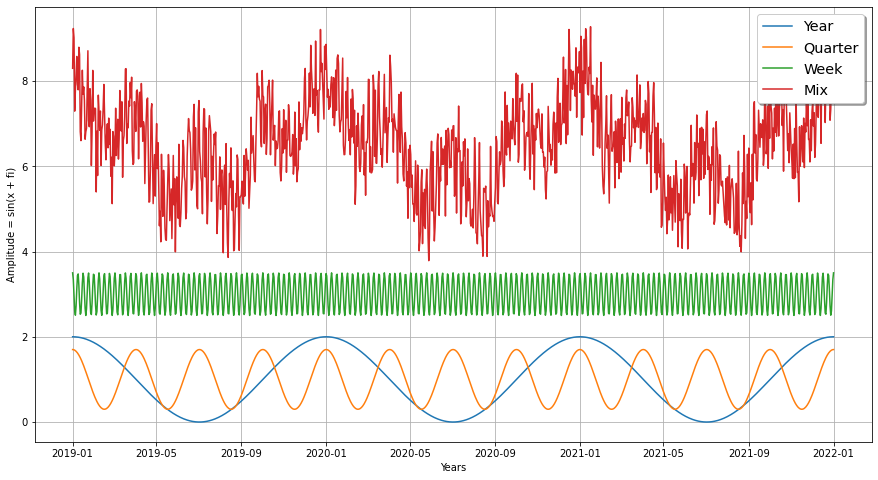

In [ ]:
t = np.linspace(0, SR, SR)                 #Generate time axis
print("Частота квартальная:", f_quarter)
print("Частота недельная:", f_week)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.ylabel('Amplitude = sin(x + fi)')
plt.xlabel('Years')
plt.grid(True, which='both')
plt.plot(time, y_year, label='Year')
plt.plot(time, y_quarter, label='Quarter')
plt.plot(time, y_week, label='Week')
plt.plot(time, y_mix, label='Mix')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('C0')
plt.show()

## Дискретное преобразование Фурье

В нашем случае ряд Фурье представлен в виде суммы трех гармонических функций.

Это модельный вариант, однако он дает возможность проверить наличие во временном ряде явно выраженных сезонны факторов.
Воспользуемся встроенными функциями Python numpy для дискретного преобразования Фурье.

Поскольку сигнал действительный, то для ускорения использовалась функция rfft.

In [ ]:
#SR = t.size  #частота дискретизации, отсчётов в секунду
N = SR # длина входного массива.
# Вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = np.fft.rfft(y_week)
orig = spectrum.copy()
freq = np.fft.rfftfreq(N, 1./SR) #Frequency axis
spectrum = 1/N * np.abs(spectrum)
spectrum[1:] = spectrum[1:]*2 # Удваиваем значение амплитуды всех гармоник за исключением 0-й

Амплитуда 0-й гармоники (постоянная составляющая — сдвиг по оси y) не требует преобразования по амплитуде.
Амплитуду других гармоник необходимо умножить на 2, чтобы получить корректное значение амплитуды исходного гармонического сигнала.
Частота временного ряда = 144, говорит об 144 изменениях за период в 3 года.

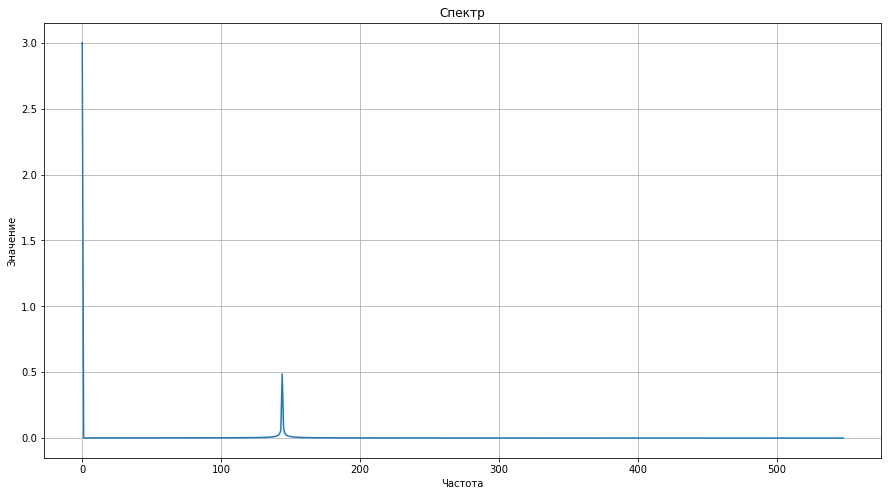

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq, spectrum)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в частоту
# интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы скорректировать амплитуду. Постоянные составляющие должны совпадать в смоделированном гармоническом сигнале и в спектре
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

Заметим, что полученная постоянная составляющая равна 3, что соответствует исходной величине амплитуды, заданной при создании функции.
Постоянная составляющая (0-я гармоника) нередко значительная, поэтому отобразим на другом графике полученное преобразование, исключив гармонику с 0-й частотой.

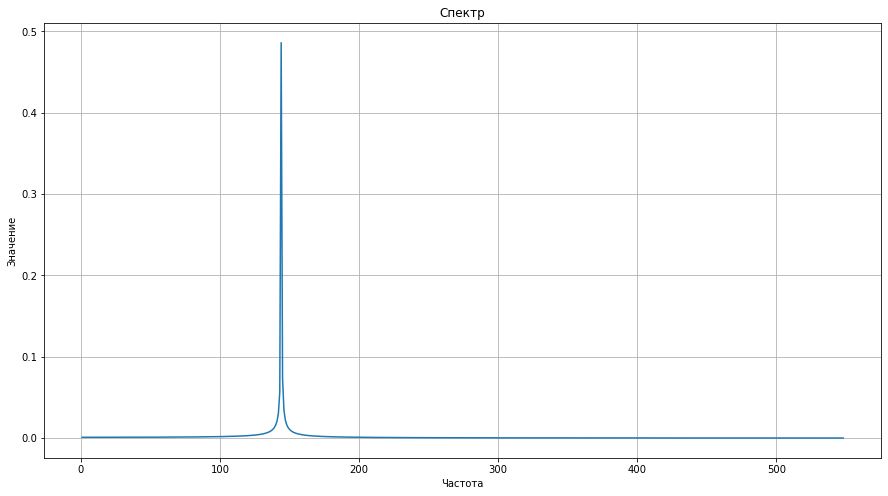

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq[1:], spectrum[1:])
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

Как видно по графику, на частоте, равной 144, выявлена гармоника с амплитудой 0.5, что соответствует заданной при моделировании временного ряда.

Сделаем теперь преобразование Фурье для смешанного временного ряда, заменив аргумент на y_mix.

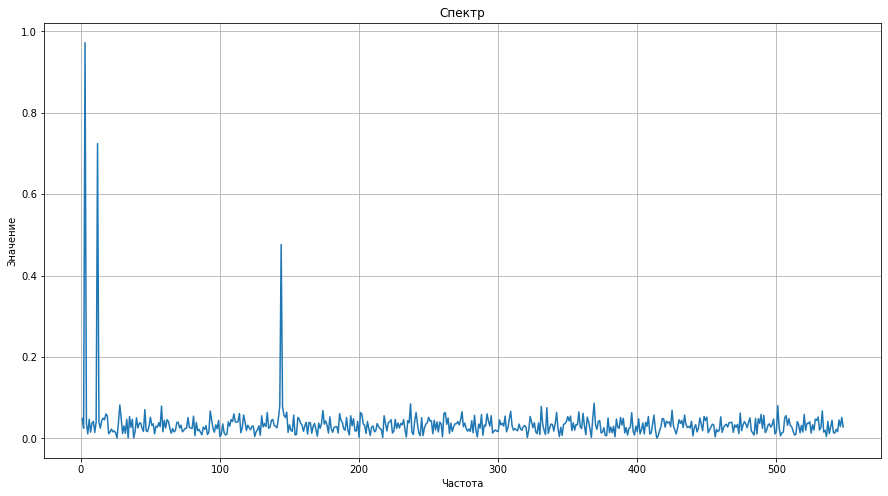

In [ ]:
spectrum = np.fft.rfft(y_mix)
orig = spectrum.copy()
spectrum = 1/N * np.abs(spectrum)
spectrum[1:] = spectrum[1:]*2
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq[1:], spectrum[1:])
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

На графике видно, что амплитуда самой низкой годовой (с частотой = 3) = 1, квартальной (с частотой = 12) = 0.7 и недельной (с частотой = 144) = 0.5 на фоне гармоник «белого шума» с низкой амплитудой.

В частотной области легко произвести очистку исходного временного ряда, отбросив значения ниже определенного уровня, соответствующие шуму, и оставив только нужные гармоники.
Затем можно произвести обратное преобразование Фурье и получить исходный временной ряд, очищенный от шума.

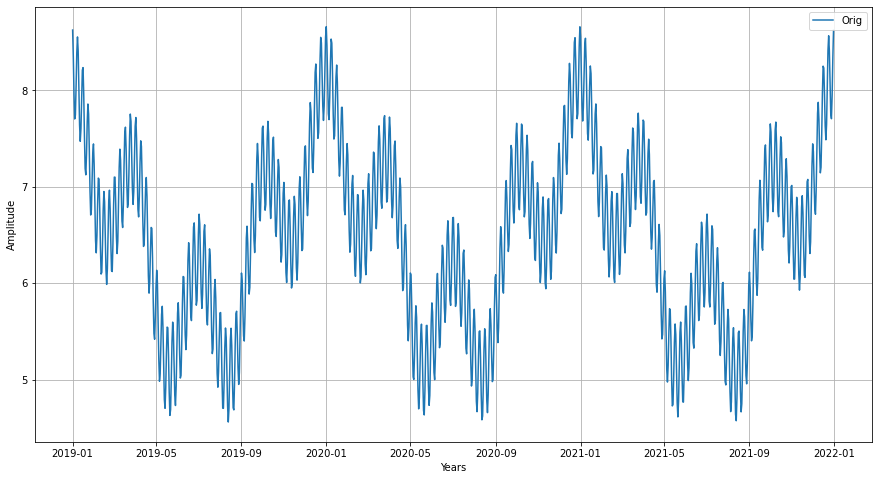

In [ ]:
orig_wo_noise = orig.copy()
orig_wo_noise[orig_wo_noise < 70] = 0
s = np.fft.irfft(orig_wo_noise)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.ylabel('Amplitude')
plt.xlabel('Years')
plt.grid(True, which='both')
plt.plot(time[:-1], s, label='Orig')
legend = ax.legend(loc='upper right')
plt.show()

При анализе наблюдений важно понимать, есть ли во временном ряде явно выраженные сезонные факторы.

Нейронные сети позволяют выявить подобные закономерности неявно, работая как «черный ящик», т.е. предсказание может быть весьма точным, но почему оно такое, понять нельзя.

Нередко матобработка временного ряда перед подачей на нейронную сеть позволяет существенно улучшить качество прогноза нейронкой.

Поэтому предварительный анализ временного ряда различными преобразованиями, в т.ч. Фурье весьма полезны.

# Задание 1. Фурье-преобразование картинки.

Сделайте преобразование Фурье от картинки в файле im1.jpg, используя файл rian.py.   Сохраните двумерный фурье-образ в файле out.jpg (параметры цвета r, g, b округлять до целых чисел).  Удалите из фурье-образа верхнюю половину пространственных частот по каждой координате. Сделайте обратное преобразование и сохраните в файле  out2.jpg

Указание.

Методом двумерного преобразования Фурье (two-dimensional Fourier transform - 2-DFT) является преобразование Фурье, произведенное над двумерным массивом данных. Рассмотрим двумерный массив данных.  Эти данные имеют два измерения: x и y. Преобразование Фурье над данными производится сначала в одном, а затем в другом направлениях.

Первая часть преобразования Фурье проводится в x измерении. Вторая часть преобразования Фурье производится в y измерении.


# Задание 2. Фурье-преобразование звука.

Возьмите файл in10.wav и, используя sound.py,  добавьте в его фурье-образ низкочастотный шум. Сохраните результат в out1.wav.
После этого обрежьте нижние частоты в фурье-образе и сохраните в out2.wav.

# Задание 3*. Быстрое умножение многочленов.

Напишите алгоритм быстрого умножения многочленов с помощью БПФ.

Более подробное описание тут [умножение многочленов](https://habr.com/ru/articles/113642/) или тут [алгоритм](http://e-maxx.ru/algo/fft_multiply)

Проверьте, использует ли его Sympy, сравнив скорость работы.